# 图片的融合
 将两张图片叠加在一起
 cv.addweighted()

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

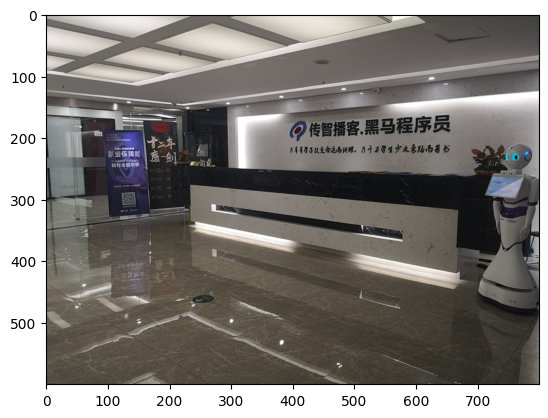

In [3]:
itheima = cv.imread("img/itheima.jpg")
tony = cv.imread("img/tony.jpg")
# 图像融合
dst = cv.addWeighted(itheima,0.5,tony,0.5,0)
imshow(itheima)

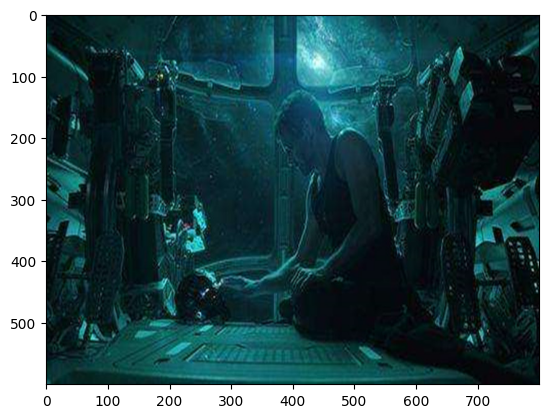

In [4]:
imshow(tony)

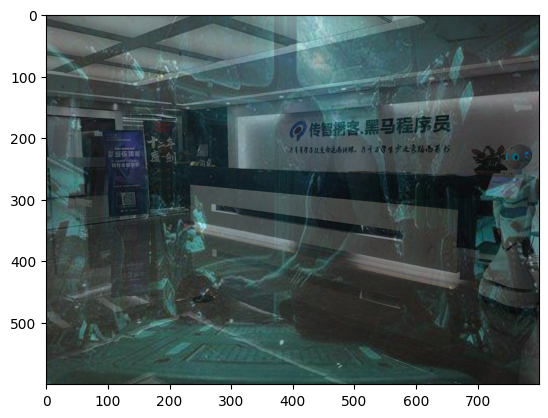

In [5]:
imshow(dst)

# 图像灰度处理

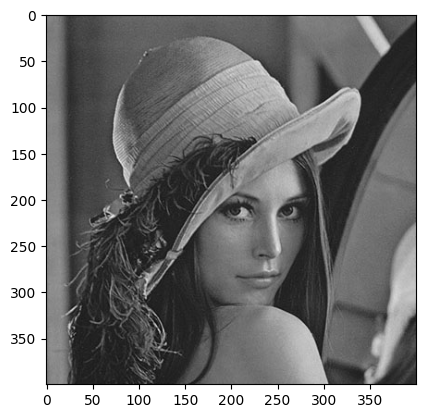

In [6]:
# 方式一
img = cv.imread("img/lena.jpg",cv.IMREAD_GRAYSCALE)
imshow(img)

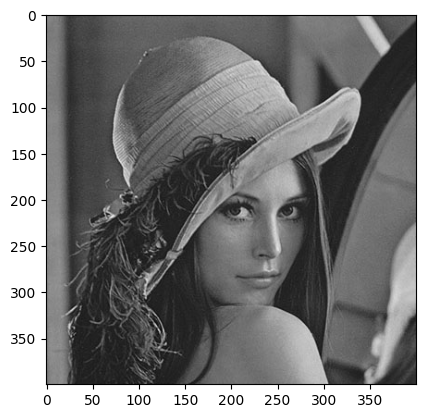

In [7]:
# 方式二
img = cv.imread("img/lena.jpg")
dst = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
imshow(dst)

# 灰度图颜色反转

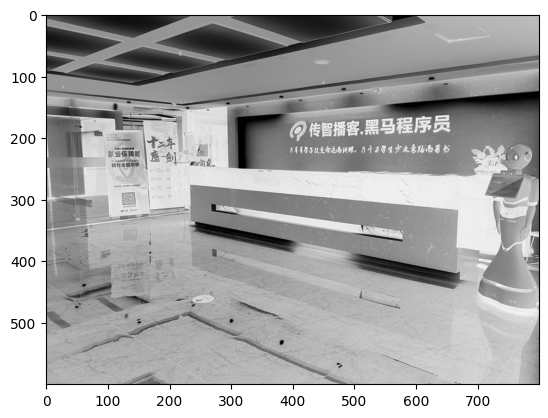

In [8]:
img = cv.imread("img/itheima.jpg",cv.IMREAD_GRAYSCALE)
height,width = img.shape[0:2]
for row in range(height):
    for col in range(width):
        # 得到每一个像素点
        color = img[row,col]
        # 颜色反转
        new_color = 255 - color
        # 将颜色填充回去
        img[row,col] = new_color
imshow(img)

# 彩色图颜色反转

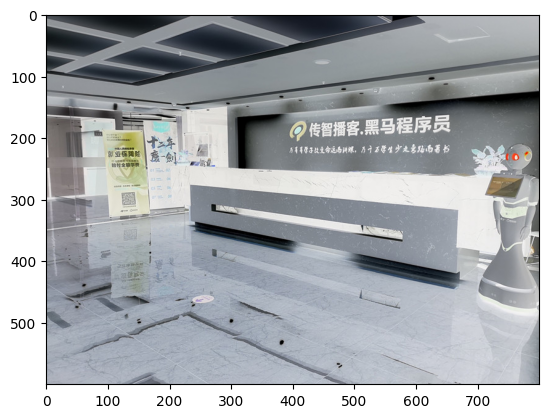

In [16]:
img = cv.imread("img/itheima.jpg")
height,width = img.shape[0:2]
for row in range(height):
    for col in range(width):
        # 获得每一个像素点
        b,g,r = img[row,col]
        # 颜色反转
        b = 255 - b
        g = 255 - g
        r = 255 - r
        # 将颜色填充回去
        img[row,col] = (b,g,r)
imshow(img)

# 图像的马赛克效果
 对图像某个区域打马赛克
 - 1 截取得到某个区域
 - 2 将该区域划分成若干个小方块
 - 3 将小方块的颜色都改成相同颜色

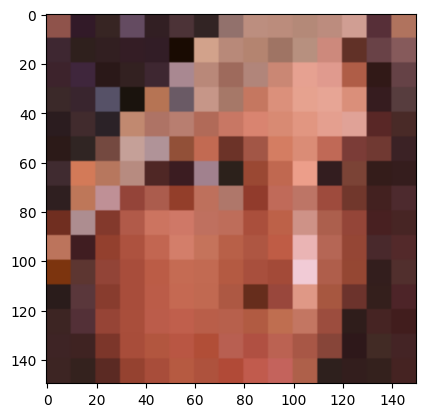

In [21]:
img = cv.imread("img/lena.jpg")
# 截取每个区域
dst = img[150:300,150:300]
height,width = dst.shape[0:2]
offset = 10
for row in range(height):
    for col in range(width):
        # 每隔4x4区域修改颜色
        if row % offset == 0 and col % offset == 0:
            # 得到颜色信息
            color = dst[row,col]
            
            for i in range(offset):
                for j in range(offset):
                    new_row = row + i
                    new_col = col + j
                    if new_row >= height:
                        new_row = height - 1
                    if new_col >= width:
                        new_col = width - 1
                    
                    dst[new_row,new_col] = color
imshow(dst)


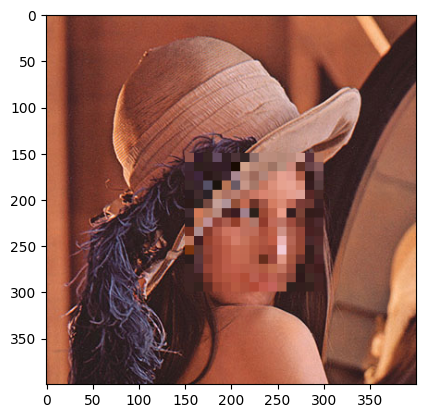

In [22]:
imshow(img)

# 图像的毛玻璃效果
 - 1 创建一个空白的图像
 - 2 遍历每一个像素点
 - 3 从像素点位置周围，随机的获取颜色
 - 4 填充到当前位置

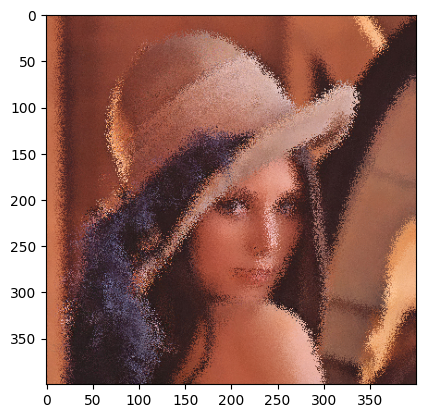

In [33]:
import numpy as np
img = cv.imread("img/lena.jpg")
# 创建一个空白图像
dst = np.zeros_like(img)
height,width = img.shape[0:2]
offset = 10
for row in range(height):
    for col in range(width):
        # 从原图当前位置周围随机获取颜色
        rand_row = np.random.randint(0,offset)
        rand_col = np.random.randint(0,offset)
        new_row = row + rand_row
        new_col = col + rand_col
        # 防止越界
        if new_row >= height:
            new_row = height - 1
        if new_col >= width:
            new_col = width - 1
        # 获取随机的颜色值
        rand_color = img[new_row,new_col]
        dst[row,col] = rand_color
imshow(dst)